In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
df = pd.read_excel('EastWestAirlines .xlsx',sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [5]:
db = DBSCAN(min_samples=2)
y = db.fit_predict(x)
y

array([  0,   0,   0, ..., 133,   0,   0], dtype=int64)

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
silhouette_score(x,y)

-0.3555620812082463

In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
neigh = NearestNeighbors(n_neighbors=4).fit(x)
dist,ind = neigh.kneighbors(x)

In [10]:
dist = np.sort(dist, axis=0)
dist

array([[0.00000000e+00, 2.42270462e-03, 1.60481490e-02, 2.04667057e-02],
       [0.00000000e+00, 2.42270462e-03, 1.69466758e-02, 2.04667057e-02],
       [0.00000000e+00, 4.69027727e-03, 1.87634365e-02, 2.08215136e-02],
       ...,
       [0.00000000e+00, 6.66765339e+00, 7.58357087e+00, 8.16395202e+00],
       [0.00000000e+00, 6.68121018e+00, 8.08352349e+00, 8.35103575e+00],
       [0.00000000e+00, 7.58357087e+00, 1.25491562e+01, 1.33661480e+01]])

In [11]:
d = dist[:,1]
d

array([2.42270462e-03, 2.42270462e-03, 4.69027727e-03, ...,
       6.66765339e+00, 6.68121018e+00, 7.58357087e+00])

Text(0.5, 1.0, 'K-dist Plot')

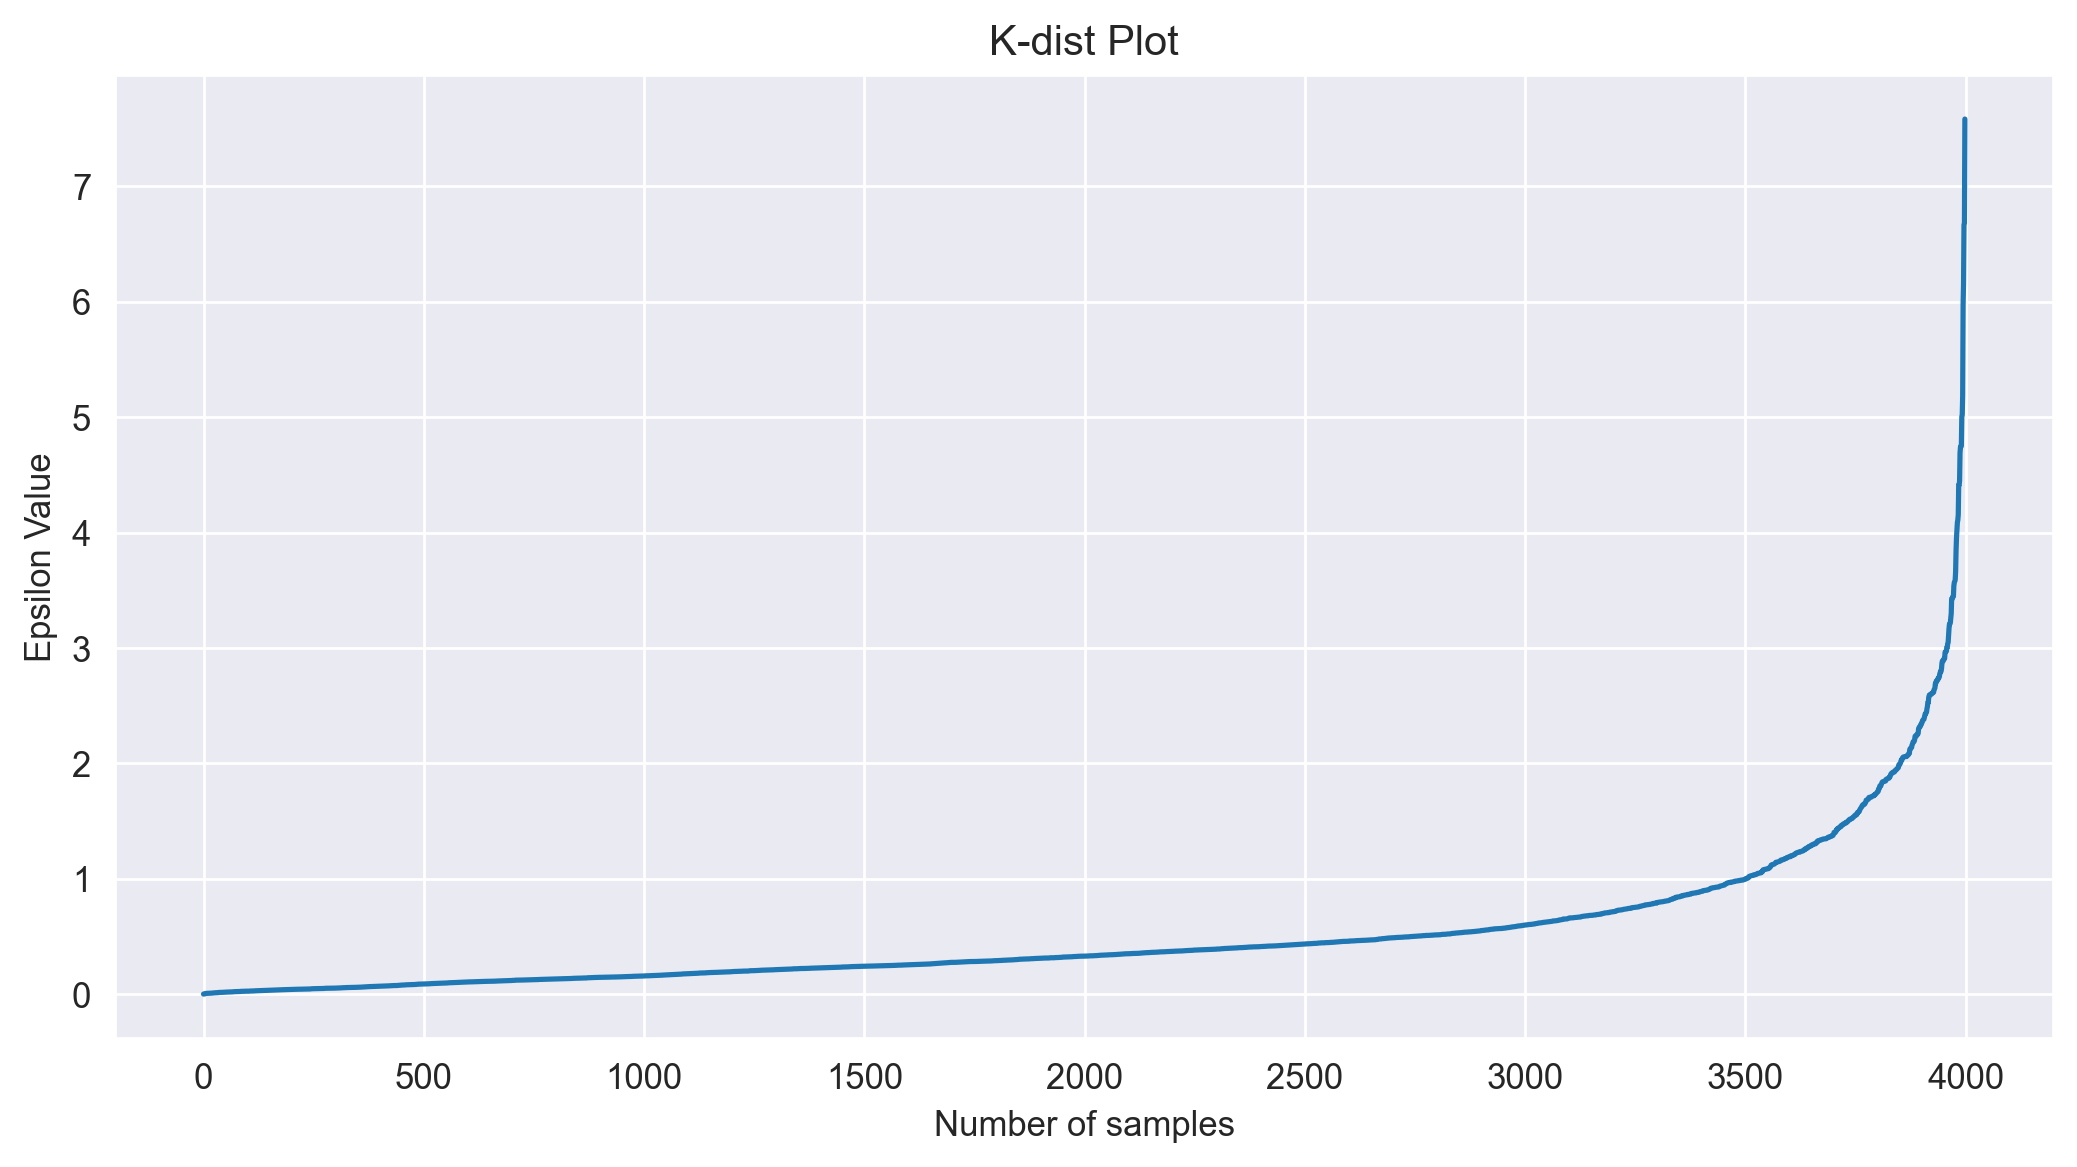

In [12]:
plt.plot(d)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

In [13]:
db = DBSCAN(eps=0.35,min_samples=2)
y = db.fit_predict(x)
y

array([  0,   0,   0, ..., 168,   0,   0], dtype=int64)

In [14]:
silhouette_score(x,y)

-0.44262534328354447

In [15]:
df['y'] = y